# Import Libs

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg 
import seaborn as sns

import os

In [3]:
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from keras.regularizers import l2
from keras.preprocessing import image
from keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping

In [4]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop, SGD
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras import layers, Model
from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2

# Connect My google Drive

In [5]:
from google.colab import drive
from google.colab import files
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
%cd /content/drive/My\ Drive/Colab\ Notebooks/AiAT/week3
%ls

/content/drive/My Drive/Colab Notebooks/AiAT/week3
images/  my_model_InceptionResNetV2.h5  train.csv  Untitled0.ipynb


In [7]:
print(tf.__version__)

2.3.0


# Load File

In [7]:
data_df = pd.read_csv("train.csv")

In [8]:
data_df.head()

,id,category
0,6380fb87-18fe-4b76-a085-639a4e01b664.jpg,0
1,9956035b-0500-47b7-b508-cc7414c10270.jpg,0
2,fa6b4604-a080-410b-a8d1-fdf7cf61a92d.jpg,0
3,6e6dc67b-73ba-404b-b685-1f726d0357c3.jpg,0
4,15121f8e-f428-4cd5-83bf-1c9a051aea54.jpg,0


In [9]:
data_df.shape

(1725, 2)

In [10]:
data_df['id'].value_counts()

1c58106b-f7e8-4bfe-a4e1-5761dd70dcde.jpg    1
d73016a6-c1da-46f3-a974-1df8262d3b9f.jpg    1
420bd5b7-d96b-4769-a05a-1312bf91c49d.jpg    1
8785d7a6-ed9c-46ec-b0d9-04fd5319afb5.jpg    1
6c232f78-ce17-4085-ab4e-c5b4863b8c9a.jpg    1
                                           ..
a1c9c9a6-d8a4-4cc8-80b1-dc9ad82e66f8.jpg    1
9e326054-21dd-4e1d-9626-10e1122b5991.jpg    1
7cdf5fdd-fb6e-40b0-b3bc-6cb44c6da193.jpg    1
a25be6b2-69c1-4efb-845e-23d393a9a822.jpg    1
95f88abc-926f-42af-a166-a97493760150.jpg    1
Name: id, Length: 1725, dtype: int64

In [11]:
data_df['category'].value_counts()

0    1317
1     408
Name: category, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


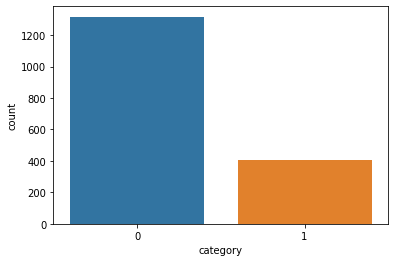

In [12]:
sns.countplot(data_df['category'])

In [13]:
data_dir = os.path.join('images')

In [14]:
os.listdir(data_dir)

['test', 'train']

# Spliting

In [15]:
X = data_df['id']
y = data_df['category']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=38)

In [16]:
len(X_train)

1380

# Read Images from paths

In [17]:
X_train_img = np.zeros((len(X_train), 300, 300, 3))

In [18]:
X_train

224     f7d42c49-a2ac-41c7-ac83-18f2e496ff1c.jpg
836     f4e2e7da-f8ac-4c5b-af07-f99cd6ef8e49.jpg
386     9047d48c-ee7f-4d10-a749-c8ff82a5ffac.jpg
1621    b959f195-6059-4d8f-bb5a-8fd7bf2559f8.jpg
885     6f898478-2391-4a73-866c-d75f351191f0.jpg
                          ...                   
900     15d25038-af74-44e9-b5b8-8a6d6278198a.jpg
316     53a56e1d-470e-4876-8dfe-be11ab72866d.jpg
1491    b9bfc104-a7ba-41fd-8376-a509f2d01e12.jpg
53      8cdb3c26-72f8-447d-84d8-ba938d741a73.jpg
1441    081ac24f-cf9c-4496-a249-1e15863b81a7.jpg
Name: id, Length: 1380, dtype: object

In [19]:
count = 0
for index in X_train.index:
  if y_train[index]==1:
    img = image.load_img("images/train/1"+"/"+X_train[index], target_size=(300, 300, 3))
    temp = image.img_to_array(img)
    X_train_img[count] = temp
    count += 1
  else: #y_train==0
    img = image.load_img("images/train/0"+"/"+X_train[index], target_size=(300, 300, 3))
    temp = image.img_to_array(img)
    X_train_img[count] = temp
    count += 1
    #print(index)

In [20]:
X_train_img.shape

(1380, 300, 300, 3)

In [21]:
X_train_img[10]

array([[[43., 49., 35.],
        [45., 54., 27.],
        [47., 55., 40.],
        ...,
        [11., 11., 11.],
        [13., 13., 15.],
        [15., 15., 17.]],

       [[42., 48., 36.],
        [45., 54., 27.],
        [45., 53., 40.],
        ...,
        [12., 12., 12.],
        [14., 14., 16.],
        [16., 16., 18.]],

       [[46., 52., 40.],
        [46., 54., 30.],
        [48., 54., 42.],
        ...,
        [13., 13., 13.],
        [13., 13., 13.],
        [16., 16., 16.]],

       ...,

       [[ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 1.,  1.,  1.],
        ...,
        [36., 37., 21.],
        [34., 35., 19.],
        [23., 24., 19.]],

       [[ 1.,  1.,  1.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        ...,
        [45., 44., 23.],
        [49., 48., 28.],
        [41., 38., 31.]],

       [[ 2.,  2.,  2.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        ...,
        [54., 52., 27.],
        [65., 63., 40.],
        [42., 38., 29.]]

In [22]:
X_val_img = np.zeros((len(X_val), 300, 300, 3))

In [23]:
X_val

704     c37aff12-001e-4172-a4ce-49361702b5f1.jpg
1349    35aa8cee-ffab-4572-b71c-e1ada82da473.jpg
1717    a9c8cfdc-0f43-4fee-b1e3-d5ad4f2f7936.jpg
1259    2db8e689-8511-492c-9b03-0cff9af6cf97.jpg
1696    cce5c888-02d2-4633-b3fc-0e2dc37f3ff8.jpg
                          ...                   
203     cd40004b-8fc2-4529-b39e-01f0ac8d08f1.jpg
46      2e84a820-e275-40b1-b933-62e234e86357.jpg
175     5b4b3511-6228-4da9-8ea0-5aaceb800eff.jpg
531     5cfdf1fa-23f4-462d-a000-54804c7a71d6.jpg
549     e95f5b5a-91f2-4865-bda8-e5c3c5192594.jpg
Name: id, Length: 345, dtype: object

In [24]:
count = 0
for index in X_val.index:
  if y_val[index]==1:
    img = image.load_img("images/train/1"+"/"+X_val[index], target_size=(300, 300, 3))
    temp = image.img_to_array(img)
    X_val_img[count] = temp
    count += 1
  else: #y_train==0
    img = image.load_img("images/train/0"+"/"+X_val[index], target_size=(300, 300, 3))
    temp = image.img_to_array(img)
    X_val_img[count] = temp
    count += 1
    #print(index)

In [25]:
X_val_img.shape

(345, 300, 300, 3)

In [26]:
X_val_img[10]

array([[[ 80.,  64.,   4.],
        [ 94.,  76.,  12.],
        [ 93.,  75.,   9.],
        ...,
        [ 96.,  76.,   7.],
        [ 96.,  76.,   7.],
        [ 93.,  73.,   2.]],

       [[ 88.,  71.,  19.],
        [ 92.,  76.,  16.],
        [ 96.,  78.,  14.],
        ...,
        [100.,  76.,  14.],
        [ 99.,  75.,  15.],
        [ 97.,  72.,  15.]],

       [[ 53.,  36.,   0.],
        [101.,  84.,  28.],
        [ 92.,  77.,  12.],
        ...,
        [ 95.,  68.,   0.],
        [ 94.,  65.,   0.],
        [124.,  96.,  23.]],

       ...,

       [[239., 236., 219.],
        [239., 236., 219.],
        [239., 236., 219.],
        ...,
        [ 85.,  55.,   3.],
        [ 78.,  52.,   3.],
        [ 73.,  49.,   1.]],

       [[238., 235., 218.],
        [238., 235., 216.],
        [238., 235., 216.],
        ...,
        [ 93.,  63.,   9.],
        [ 81.,  56.,   2.],
        [ 69.,  47.,   0.]],

       [[237., 234., 215.],
        [238., 236., 215.],
        [238., 2

# ImageDataGenerator

In [27]:
train_datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

vali_datagen = ImageDataGenerator(rescale=1./255)

In [29]:
y_train = y_train.values
y_val = y_val.values

In [30]:
y_train

array([0, 0, 0, ..., 1, 0, 1])

In [31]:
y_val

array([0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

# Set Parameter befor download model

In [34]:
batch_size = 32

In [37]:
train_data = train_datagen.flow(np.array(X_train_img), np.array(y_train).astype(float), batch_size=batch_size)
val_data = vali_datagen.flow(np.array(X_val_img), np.array(y_val).astype(float), batch_size=batch_size)

In [38]:
loss = tf.keras.losses.BinaryCrossentropy(from_logits=False, label_smoothing=0.1)
epochs = 100

In [39]:
lr = 0.0001

In [40]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

# Loading the InceptionResNetV2 model

In [41]:
resnet_v2 = InceptionResNetV2(include_top=False, weights='imagenet', input_tensor=None, input_shape=(300, 300, 3))

In [43]:
for layer in resnet_v2.layers:
    layer.trainable = True

In [44]:
resnet_v2.summary()

Model: "inception_resnet_v2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 300, 300, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 149, 149, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 149, 149, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 149, 149, 32) 0           batch_normalization[0][0]        
________________________________________________________________________________

In [45]:
last_layer = resnet_v2.get_layer('conv_7b_ac')
output = last_layer.output

In [47]:
x = layers.GlobalAveragePooling2D()(output)
x = layers.Flatten()(x)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dropout(0.1)(x)                  
x = layers.Dense(64, activation='relu')(x)
x = layers.Dropout(0.1)(x)      
x = layers.Dense(32, activation='relu')(x)
x = layers.Dense(1, activation='sigmoid')(x)

In [48]:
extend_resnet_v2 = Model(resnet_v2.input, x)

In [49]:
#extend_resnet_v2.summary()

In [50]:
del data_df
del X 
del y
del X_train, X_val, y_train, y_val

In [51]:
optimizer = RMSprop()

In [52]:
extend_resnet_v2.compile(optimizer = optimizer, loss = loss, metrics = ['acc'])

In [57]:
history = extend_resnet_v2.fit(train_data,steps_per_epoch = len(X_train_img)//batch_size ,epochs=epochs,
                    validation_data = val_data,
                    validation_steps = len(X_train_img)//batch_size ,
                    callbacks=callback)

Epoch 1/100
43/43 [==============================] - 40s 931ms/step - loss: 0.5761 - acc: 0.7634 - val_loss: 277705.9062 - val_acc: 0.7333
Epoch 2/100
43/43 [==============================] - 34s 798ms/step - loss: 0.5053 - acc: 0.7982
Epoch 3/100
43/43 [==============================] - 34s 796ms/step - loss: 0.4995 - acc: 0.8101
Epoch 4/100
43/43 [==============================] - 35s 802ms/step - loss: 0.4705 - acc: 0.8249
Epoch 5/100
43/43 [==============================] - 34s 802ms/step - loss: 0.4836 - acc: 0.8264
Epoch 6/100
43/43 [==============================] - 34s 802ms/step - loss: 0.4470 - acc: 0.8494
Epoch 7/100
43/43 [==============================] - 34s 801ms/step - loss: 0.4521 - acc: 0.8494
Epoch 8/100
43/43 [==============================] - 34s 801ms/step - loss: 0.4297 - acc: 0.8524
Epoch 9/100
43/43 [==============================] - 34s 800ms/step - loss: 0.4284 - acc: 0.8598
Epoch 10/100
43/43 [==============================] - 34s 802ms/step - loss: 0.3993 -

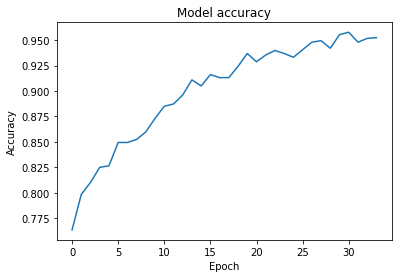

In [61]:
plt.plot(history.history['acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

In [63]:
extend_resnet_v2.save('my_model_InceptionResNetV2.h5')
#model.save_weights(filepath = 'weights')

# Load model

In [38]:
my_model = load_model('my_model_InceptionResNetV2.h5')

# Load test data

In [39]:
test_path = os.listdir('images/test/images')
len(test_path)

398

In [40]:
temp_col = ['id']
test_df = pd.DataFrame(test_path, columns=temp_col)
test_df['category'] = ''

In [41]:
test_df.head()

,id,category
0,0e6f59e1-d7a1-4e4e-9a41-5188b96024c8.jpg,
1,0ecefc69-d987-4bd2-8000-2c6120672217.jpg,
2,0eaf2403-d8c9-4ad5-b89b-69bb178dba30.jpg,
3,0f49d62b-f490-43ea-b767-68c40a613fa6.jpg,
4,0e15a1a0-6567-4669-b1cf-4e5fa2a298f7.jpg,


In [42]:
test_df.shape[0]

398

In [43]:
test_df['id'].value_counts()

175fdbdf-4ba0-4747-88ba-661bbd98574b.jpg    1
d7da7037-5bfe-470f-a4a8-54189f5f9512.jpg    1
9b5aab52-e4d0-44c9-ae92-3dbe369b6785.jpg    1
4f741626-9170-4856-bdfa-9ec3fba5d861.jpg    1
16f59f52-86e9-4016-bca0-836d9c451f8c.jpg    1
                                           ..
ae8ecfb5-9413-43bb-a89b-e835038c06ee.jpg    1
0ac5c4e2-a5ce-4f30-ac80-2ca1ee793ee1.jpg    1
250500fb-3767-4474-b9ac-9c01772f37f3.jpg    1
ccf041c6-e782-4763-8555-dfda470f914b.jpg    1
707f800a-3fed-4980-9edd-34d47edd9792.jpg    1
Name: id, Length: 398, dtype: int64

In [44]:
#del X_train_img, X_val_img

## Rescale and Size test data

In [45]:
X_test_img = np.zeros((test_df.shape[0], 300, 300, 3))

In [46]:
X_test_img.shape

(398, 300, 300, 3)

In [48]:
count = 0
for img in test_df['id']:
    #print(img)
    img = image.load_img('images/test/images'+'/'+str(img), target_size=(300, 300, 3))
    temp = image.img_to_array(img)
    X_test_img[count] = temp
    count += 1
    #print(count)

In [49]:
X_test_img[0]

array([[[100.,  48.,   9.],
        [100.,  48.,   9.],
        [ 98.,  44.,   6.],
        ...,
        [ 98., 145., 153.],
        [190., 219., 233.],
        [203., 226., 240.]],

       [[100.,  48.,   9.],
        [ 99.,  47.,   8.],
        [101.,  48.,   8.],
        ...,
        [102., 151., 158.],
        [192., 221., 235.],
        [202., 228., 241.]],

       [[102.,  50.,  10.],
        [101.,  49.,   9.],
        [104.,  51.,  11.],
        ...,
        [132., 181., 188.],
        [196., 228., 241.],
        [203., 231., 243.]],

       ...,

       [[ 88.,  47.,  19.],
        [ 97.,  57.,  32.],
        [ 90.,  54.,  30.],
        ...,
        [ 32.,  36.,  37.],
        [ 25.,  31.,  29.],
        [ 29.,  35.,  33.]],

       [[100.,  58.,  33.],
        [ 93.,  53.,  28.],
        [ 97.,  59.,  38.],
        ...,
        [ 27.,  31.,  32.],
        [ 23.,  29.,  29.],
        [ 30.,  36.,  36.]],

       [[ 93.,  51.,  26.],
        [ 88.,  48.,  23.],
        [ 90.,  

In [50]:
X_test_img.shape

(398, 300, 300, 3)

In [51]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [52]:
test_data_img = test_datagen.flow(np.array(X_test_img))

## Predicting

In [53]:
results = my_model.predict(test_data_img, verbose=1)

13/13 [==============================] - 3s 211ms/step


In [54]:
round_result_list = []
for i in range(len(results)):
  if results[i] >= 0.5:
    round_result_list.append(1)
  else:
    round_result_list.append(0)

In [55]:
round_result_list[0:15]

[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [56]:
test_df['category'] = round_result_list

In [57]:
test_df.head(15)

,id,category
0,0e6f59e1-d7a1-4e4e-9a41-5188b96024c8.jpg,0
1,0ecefc69-d987-4bd2-8000-2c6120672217.jpg,0
2,0eaf2403-d8c9-4ad5-b89b-69bb178dba30.jpg,0
3,0f49d62b-f490-43ea-b767-68c40a613fa6.jpg,0
4,0e15a1a0-6567-4669-b1cf-4e5fa2a298f7.jpg,0
5,0eaf2870-82dc-4836-9545-7f898bc43dc3.jpg,1
6,0f913245-1412-4308-97d9-d10f590461f5.jpg,0
7,0cb58079-9bad-4f1d-923c-30ab4c7a3808.jpg,0
8,0d6fcdc8-d18a-4cf5-8fcd-dc93ea3e6468.jpg,0
9,0c5e07b3-6350-442e-a2d3-a31d986d71ca.jpg,0


In [58]:
test_df.shape

(398, 2)

In [59]:
test_df = test_df.drop_duplicates()

In [60]:
test_df.shape

(398, 2)

## Create csv file to send

In [61]:
test_df.to_csv('22p25w0080_v2.csv', index = False)